In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
sns.set_theme()

In [3]:
df = pd.DataFrame(columns=["n", "t"])

In [4]:
for i in range(1, 101):
    temp = pd.read_csv("../build/{}.txt".format(1000*i), header=None).rename({0: "t"}, axis=1)
    temp["n"] = 1000*i
    df = df.append(temp)

In [5]:
df["n"] = df["n"].astype(np.float)
df["t"] = df["t"].astype(np.float)

<AxesSubplot:xlabel='n', ylabel='t'>

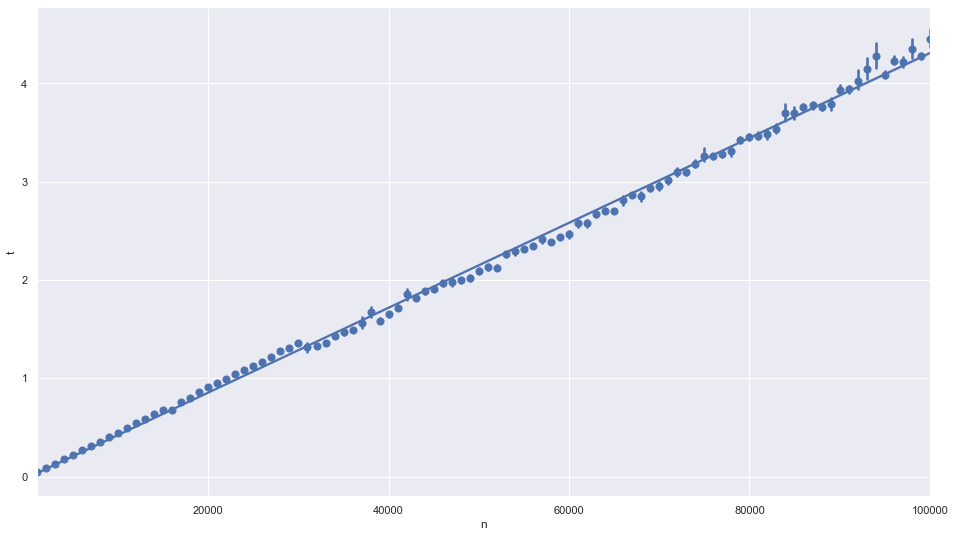

In [6]:
plt.figure(figsize=(16, 9))
sns.regplot(x="n", y="t", x_estimator=np.mean, data=df)

In [7]:
df["t_mean"] = df.groupby("n")["t"].transform("mean")
df["t_std"] = df.groupby("n")["t"].transform("std")

In [8]:
df = df.drop("t", axis=1).drop_duplicates(ignore_index=True)

In [9]:
t_n_median = df.loc[df["n"] == 50000, "t_mean"].values[0]

In [10]:
c = t_n_median / 50000

In [16]:
t_n_median

2.091506

In [15]:
c

4.183012e-05

In [11]:
df["q"] = df["t_mean"] / (c*df["n"])

In [12]:
df["n"] = df["n"].astype(np.int)

In [13]:
df

,n,t_mean,t_std,q
0,1000,0.044868,0.001714,1.072614
1,2000,0.086397,0.004010,1.032707
2,3000,0.131783,0.001370,1.050147
3,4000,0.177077,0.002754,1.058309
4,5000,0.222684,0.001477,1.064705
...,...,...,...,...
95,96000,4.231937,0.068925,1.053850
96,97000,4.219473,0.093437,1.039914
97,98000,4.349708,0.172966,1.061072
98,99000,4.283477,0.054128,1.034361


In [14]:
df.to_csv("optimal.csv", index=False)